In [3]:
import pandas as pd
import numpy as np
from pprint import pprint

from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('../data/regression_model/data_all_proteins.csv', index_col=0)
df.head(2)

X = df[df.columns.difference(['Ln.K_f.'])]
y = df['Ln.K_f.']

# Visualising the data

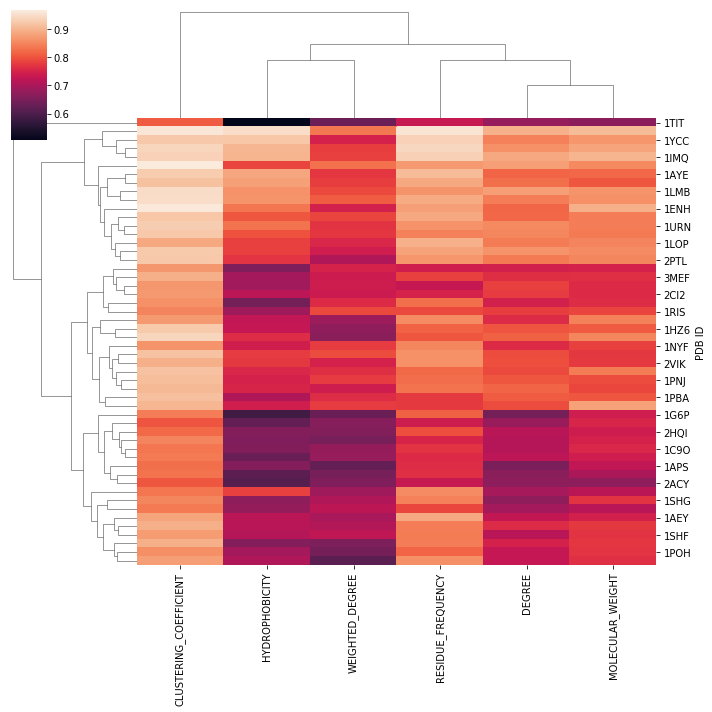

In [5]:
import seaborn as sns
sns.clustermap(X)

/home/divyanshu/anaconda3/envs/gsp/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


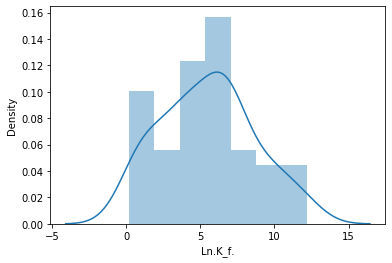

In [6]:
sns.distplot(y)

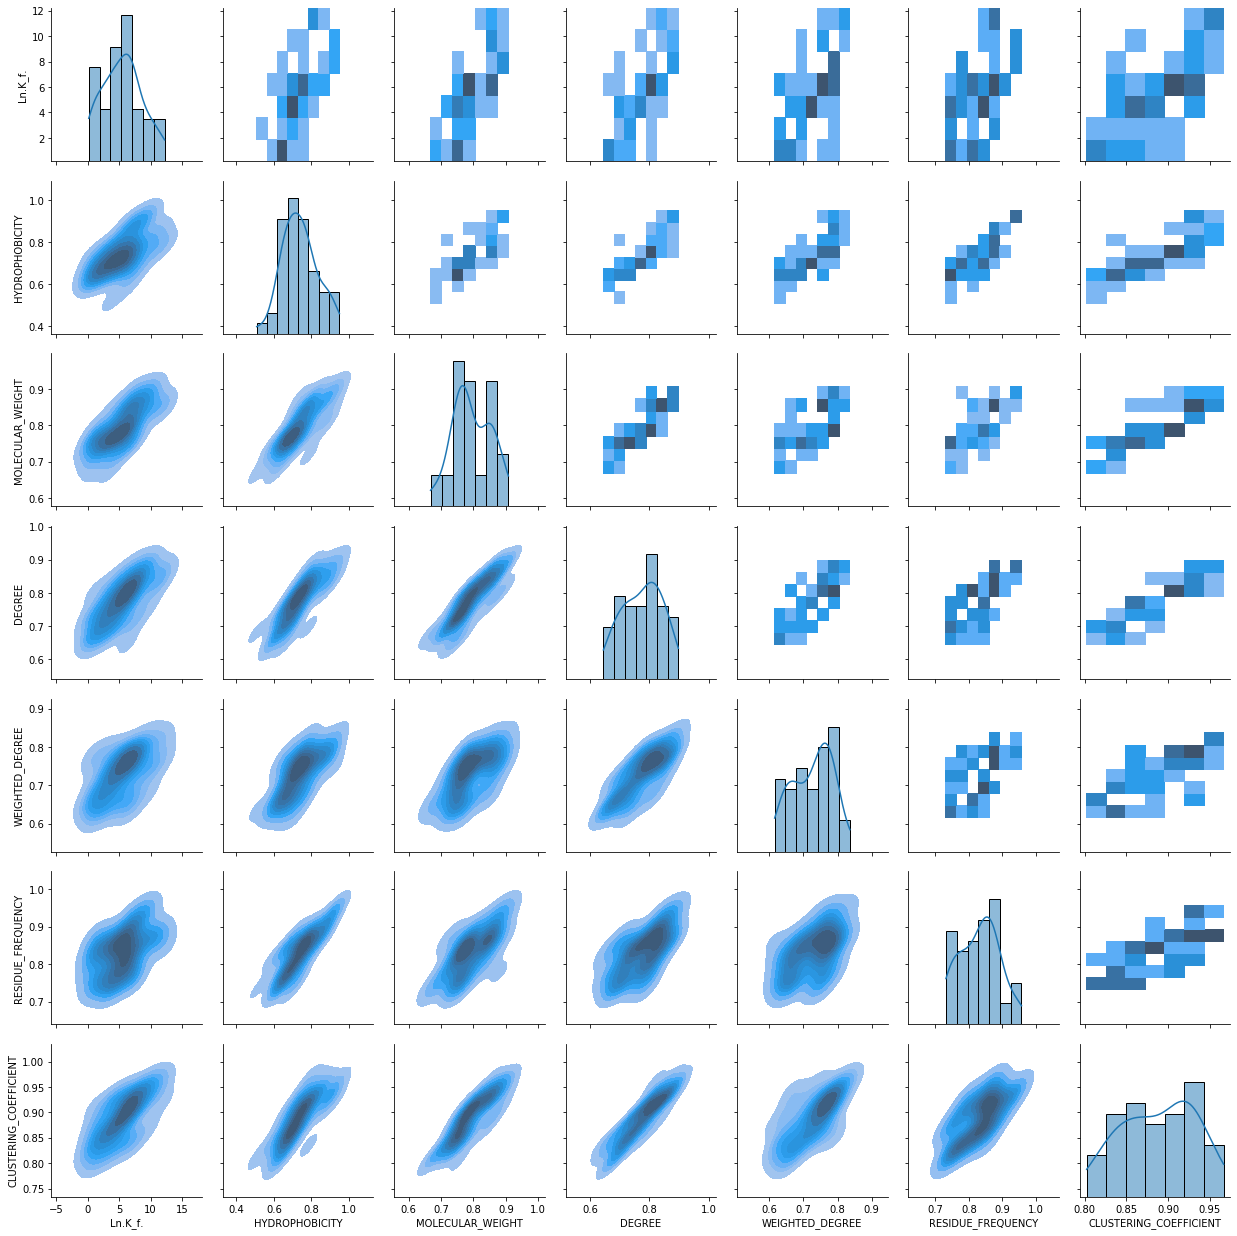

In [7]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

# Regression Analysis

In [48]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Linear Regression model

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

lr.fit(X, y)
lr.score(X, y)

0.5547770131297698

In [54]:
lr.coef_

array([11.13054181,  1.46074685,  0.8627949 , 28.57850749, -3.69577442,
        4.80209169])

In [55]:
lr.intercept_

-29.28896192159614

In [57]:
X.columns

Index(['CLUSTERING_COEFFICIENT', 'DEGREE', 'HYDROPHOBICITY',
       'MOLECULAR_WEIGHT', 'RESIDUE_FREQUENCY', 'WEIGHTED_DEGREE'],
      dtype='object')

## AdaBoost Regression model

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
# print ('Training set score: ', rfr.score(X_train, y_train))
print ('Testing set score: ', rfr.score(X_test, y_test))

# rfr.fit(X, y)
# print ('Entire set score: ', rfr.score(X, y))

## Grid Search

### Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)

base_model.fit(X_train, y_train)
print ('Base model: ', base_model.score(X_test, y_test))

best_random = rf_random.best_estimator_
print ('Best Random Model: ', best_random.score(X_test, y_test))

In [ ]:
rf_random.best_params_

### Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [2, 4, 6],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [1200, 1400, 1600], 
    'random_state': [42]
}# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
print ('Best Grid Model: ', best_grid.score(X_test, y_test))

## Suport Vector based Regression

In [21]:
from sklearn.svm import SVR

svr = SVR(kernel='poly', degree=1, C=1)
svr.fit(X_train, y_train)
print (svr.score(X_test, y_test))
print ()

0.3764192553129696



In [23]:
# G1 - 5yj4 - mutant

# np.exp(adr.predict([[0.414627105062628, 0.7449696937159775, 0.19780112538664613, 0.4757677147410022,  0.40344800961022637, 0.568501493337724]]))
np.exp(svr.predict([[0.414627105062628, 0.7449696937159775, 0.19780112538664613, 0.4757677147410022,  0.40344800961022637, 0.568501493337724]]))

array([0.00235836])

In [22]:
# G2 - 5yj5 - wildtype

np.exp((svr.predict([[0.4011229604047913, 0.7574579201459277, 0.19561848120760447, 0.4424913685637587, 0.40653529109415615, 0.5906514756004387]])))

array([0.00203311])